In [3]:
from functions import kddDfEncode
from functions import kddMutualInfo
from functions import saveList
from functions import retainFeatures
from functions import analyze


from sklearn import preprocessing
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np




dataset_file = 'datasets/kddcup.data_10_percent_corrected.csv'
feature_names = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = feature_names.iloc[:,0].values

kdd = pd.read_csv(dataset_file, names=kdd_names)


In [4]:
kdd.drop_duplicates(keep='first', inplace=True)

In [5]:
kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [6]:
kddEncoded = kddDfEncode(kdd)

In [7]:
#kddMutualInfo(kddEncoded)

In [8]:
kddSelected = retainFeatures(kddEncoded,40) #retains top N features via pearson correlation list
kddSelected

,duration,src_bytes,dst_bytes,hot,logged_in,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,...,flag_SF,service_domain_u,service_eco_i,service_ecr_i,service_ftp_data,service_http,service_other,service_private,service_smtp,attack_type
0,0,181,5450,0,1,0,8,8,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
1,0,239,486,0,1,0,8,8,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
2,0,235,1337,0,1,0,8,8,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
3,0,219,1337,0,1,0,6,6,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
4,0,217,2032,0,1,0,6,6,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,1,0,4,5,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
494017,0,282,2286,0,1,0,6,6,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.
494018,0,203,1200,0,1,0,6,18,0.17,0.11,...,1,0,0,0,0,1,0,0,0,normal.
494019,0,291,1200,0,1,0,6,12,0.00,0.00,...,1,0,0,0,0,1,0,0,0,normal.


In [9]:
kddEncoded.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_type
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.


In [10]:
X = kddEncoded.drop(columns='attack_type')
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit_transform(X.values)

In [12]:
X_scaled = pd.DataFrame(scaler1, index=X.index, columns=X.columns)
#X_scaled = retainFeatures(X_scaled,20)
X_scaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,-0.10785,-0.004293,0.042596,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
1,-0.10785,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
2,-0.10785,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
3,-0.10785,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
4,-0.10785,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.10785,-0.004222,-0.016096,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
494017,-0.10785,-0.004237,-0.009436,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
494018,-0.10785,-0.004281,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498
494019,-0.10785,-0.004232,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.059407,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498


In [13]:
Y = kddEncoded['attack_type']

In [14]:
Y_encoded = pd.get_dummies(Y, columns='attack_type')

In [15]:
Y_encoded

,R2L,U2R,dos,normal.,probe
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
494016,0,0,0,1,0
494017,0,0,0,1,0
494018,0,0,0,1,0
494019,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y_encoded, test_size=0.3, random_state=42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(50, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(10, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(Y_encoded.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)
        

Epoch 1/1000
2389/2389 - 2s - loss: 0.2050 - val_loss: 0.0693 - 2s/epoch - 873us/step
Epoch 2/1000
2389/2389 - 2s - loss: 0.0496 - val_loss: 0.0537 - 2s/epoch - 691us/step
Epoch 3/1000
2389/2389 - 2s - loss: 0.0396 - val_loss: 0.0446 - 2s/epoch - 730us/step
Epoch 4/1000
2389/2389 - 2s - loss: 0.0302 - val_loss: 0.0408 - 2s/epoch - 718us/step
Epoch 5/1000
2389/2389 - 2s - loss: 0.0275 - val_loss: 0.0392 - 2s/epoch - 713us/step
Epoch 6/1000
2389/2389 - 2s - loss: 0.0239 - val_loss: 0.0384 - 2s/epoch - 688us/step
Epoch 7/1000
2389/2389 - 2s - loss: 0.0227 - val_loss: 0.0405 - 2s/epoch - 684us/step
Epoch 8/1000
2389/2389 - 2s - loss: 0.0209 - val_loss: 0.0387 - 2s/epoch - 682us/step
Epoch 9/1000
2389/2389 - 2s - loss: 0.0198 - val_loss: 0.0390 - 2s/epoch - 671us/step
Epoch 10/1000
Restoring model weights from the end of the best epoch: 5.
2389/2389 - 2s - loss: 0.0186 - val_loss: 0.0417 - 2s/epoch - 668us/step
Epoch 00010: early stopping


In [18]:
X_scaled.shape[1]

118

In [19]:
from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

Validation score: 0.9954437219525598


array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [20]:
print((y_test['R2L'] == 1).sum())
print((y_test['U2R'] == 1).sum())
print((y_test['dos'] == 1).sum())
print((y_test['normal.'] == 1).sum())
print((y_test['probe'] == 1).sum())

279
11
16306
26431
649


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [22]:
cm = confusion_matrix(y_eval, pred)

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['r2l','u2r','dos','normal','probe'])

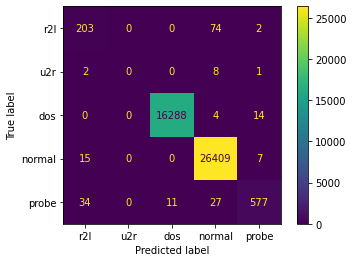

In [24]:
disp.plot()


# SVM

In [25]:
kddScaled = pd.concat([X_scaled, Y],axis=1)

In [26]:
kddScaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_type
0,-0.10785,-0.004293,0.042596,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
1,-0.10785,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
2,-0.10785,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
3,-0.10785,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
4,-0.10785,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.10785,-0.004222,-0.016096,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
494017,-0.10785,-0.004237,-0.009436,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
494018,-0.10785,-0.004281,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.
494019,-0.10785,-0.004232,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.002621,-0.00586,-0.030914,-0.009807,-0.055246,-0.026865,-0.026993,-0.026993,-0.027498,normal.


In [27]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', verbose=True, gamma='scale', kernel='linear', probability=False)

In [28]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(
    retainFeatures(X_scaled,40), Y, test_size=0.3, random_state=42)

In [29]:
pd.DataFrame(y_svm_train).value_counts()


attack_type
normal.        61401
dos            38266
probe           1482
R2L              720
U2R               41
dtype: int64

In [30]:
pd.DataFrame(y_svm_test).value_counts()

attack_type
normal.        26431
dos            16306
probe            649
R2L              279
U2R               11
dtype: int64

In [31]:
x_svm_train

,duration,src_bytes,dst_bytes,hot,logged_in,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,...,flag_S0,flag_SF,service_domain_u,service_eco_i,service_ecr_i,service_ftp_data,service_http,service_other,service_private,service_smtp
83046,-0.10785,-0.004376,-0.047028,-0.07021,-0.983122,-0.068756,-0.731401,-0.390794,-0.643361,-0.642799,...,-0.639720,0.815242,-0.196737,12.567286,-0.084287,-0.180468,-0.861903,-0.184029,-0.712888,-0.267486
16840,-0.10785,-0.004215,0.009098,-0.07021,1.017168,-0.068756,-0.611803,1.073286,-0.643361,-0.642799,...,-0.639720,0.815242,-0.196737,-0.079572,-0.084287,-0.180468,1.160223,-0.184029,-0.712888,-0.267486
107979,-0.10785,-0.004369,-0.046338,-0.07021,-0.983122,-0.068756,-0.661635,0.064697,-0.643361,-0.642799,...,-0.639720,0.815242,5.082925,-0.079572,-0.084287,-0.180468,-0.861903,-0.184029,-0.712888,-0.267486
148851,-0.10785,-0.004392,-0.047028,-0.07021,-0.983122,-0.068756,-0.731401,-0.390794,-0.643361,-0.642799,...,-0.639720,-1.226629,-0.196737,-0.079572,-0.084287,-0.180468,1.160223,-0.184029,-0.712888,-0.267486
348895,-0.10785,-0.004374,-0.047028,-0.07021,-0.983122,-0.068756,-0.731401,-0.293189,-0.643361,-0.642799,...,-0.639720,0.815242,5.082925,-0.079572,-0.084287,-0.180468,-0.861903,-0.184029,-0.712888,-0.267486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371372,-0.10785,-0.004377,-0.047028,-0.07021,-0.983122,-0.068756,0.195488,2.634971,-0.643361,-0.642799,...,-0.639720,0.815242,-0.196737,-0.079572,-0.084287,-0.180468,-0.861903,-0.184029,1.402744,-0.267486
393455,-0.10785,-0.004392,-0.047028,-0.07021,-0.983122,-0.068756,1.929668,-0.325724,1.564627,1.561957,...,1.563183,-1.226629,-0.196737,-0.079572,-0.084287,-0.180468,-0.861903,-0.184029,1.402744,-0.267486
362034,-0.10785,-0.004392,-0.047028,-0.07021,-0.983122,-0.068756,-0.412472,-0.097978,1.498387,1.561957,...,1.563183,-1.226629,-0.196737,-0.079572,-0.084287,5.541143,-0.861903,-0.184029,-0.712888,-0.267486
466449,-0.10785,-0.004392,-0.047028,-0.07021,-0.983122,-0.068756,0.404786,0.064697,-0.643361,-0.642799,...,-0.639720,-1.226629,-0.196737,-0.079572,-0.084287,-0.180468,-0.861903,-0.184029,1.402744,-0.267486


In [32]:
import time
start_time = time.time()
clf.fit(x_svm_train, y_svm_train)
end_time = time.time()

[LibSVM]

In [33]:
print("Training time: ",end_time-start_time)

Training time:  14.397260189056396


In [34]:
y_svm_predict = clf.predict(x_svm_test)

In [35]:
y_svm_predict

array(['dos', 'dos', 'dos', ..., 'normal.', 'normal.', 'normal.'],
      dtype=object)

In [36]:

score = metrics.accuracy_score(y_svm_test, y_svm_predict)
print("Validation score: {}".format(score))


Validation score: 0.9974127667368806


In [37]:
print((y_svm_test=='R2L').sum())
print((y_svm_test=='U2R').sum())
print((y_svm_test=='dos').sum())
print((y_svm_test=='normal.').sum())
print((y_svm_test=='probe').sum())

279
11
16306
26431
649


In [38]:
cm_svm = confusion_matrix(y_svm_test, y_svm_predict)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf.classes_)

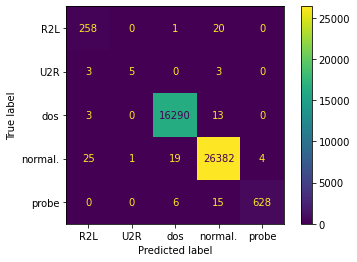

In [39]:
disp_svm.plot()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_svm_test, y_svm_predict, digits=4))

              precision    recall  f1-score   support

         R2L     0.8927    0.9247    0.9085       279
         U2R     0.8333    0.4545    0.5882        11
         dos     0.9984    0.9990    0.9987     16306
     normal.     0.9981    0.9981    0.9981     26431
       probe     0.9937    0.9676    0.9805       649

    accuracy                         0.9974     43676
   macro avg     0.9432    0.8688    0.8948     43676
weighted avg     0.9974    0.9974    0.9974     43676

